<a href="https://colab.research.google.com/github/serrve1/AlphaRisk/blob/main/%EC%9D%B4%EC%83%81%EC%B9%98%EC%B2%98%EB%A6%AC(V2)(%ED%8C%8C%EC%83%9D_%EC%B6%94%EA%B0%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from pprint import pprint
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler

warnings.filterwarnings('ignore')

In [ ]:
# import pandas as pd
# from matplotlib import font_manager, rc
# from matplotlib import pyplot as plt
# # 한글 폰트 설정
# font_path = "C:/Windows/Fonts/malgun.ttf"  # 맑은 고딕 폰트 경로
# font_name = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font_name)

In [4]:
df = pd.read_csv('/content/drive/MyDrive/프로젝트2/파생변수/df_label_4_revised.csv', index_col= 0, encoding= 'cp949')

In [5]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '배당성향', '자기자본순이익률', '매출액순이익률', '총자본순이익률',
       '경영자본순이익률', '총자본사업이익률', '총자본정상영업이익률', '매출액정상영업이익률', 'CASH FLOW 대 부채비율',
       'CASH FLOW 대 차입금비율', 'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율',
       '영업활동으로 인한 현금흐름(간접법)(*)', '금융비용', '단기차입금(*)', '유동성장기차입금의 감소', '부가가치',
       '총자본투자효율', '설비투자효율', '부가가치율', '이윤분배율', '자본분배율', '자기주식', '유동자산(*)',
       '유동부채(*)', '상장일', '유동비율', '당좌비율', '부채비율', '차입금의존도', '유동부채비율', '순운전자본비율',
       '현금비율', '유동자산구성비율', '자기자본구성비율', '비유동장기적합률', '재고자산회전률', '매출채권회전률',
       '매입채무회전률', '총자본회전률', '비유동자산회전률', '당좌자산회전률', '유형자산회전율', '경영자본회전률',
       '유동자산회전률', '자기자본회전률', '재고자산회전기간', '매출채권회전기간', '매입채무회전기간', '합계_1인년간평균급여',
       '합계_평균근속연수', '감사의견코드', '매출액증가율', '정상영업이익증가율', '순이익증가율', '총자본증가율',
       '유동자산증가율', '비유동자산증가율', '유형자산증가율', '회계기준', '년도', 'label'],
      dtype='object')

## 파생변수
### 파생1 : [(CAPEX 변화율) / (비유동부채 변화율)] *100
= capex를 늘리는 것은 호재이나, 부채가 많이 늘어나면 좋지 않으므로
Capex 증가율을 만들어야할 듯

(수정 24-3-12)그냥 둘을 빼볼까?

### 파생2
- 순현금자산 변화율   (유동자산 - 유동부채 - 비유동부채)의 변화율    


### 파생3
- 이익잉여금 변화율

### 파생4 :  조정현금비율 2011~2022
- 자사주 + 현금 / 유동부채
- 유동비율 +     (자사주/유동부채)*100 과 동일식

### 파생5:  (알파리스크)종합평가지표 = 수익률 + 활동성(가중치 조정) + 안정성 + 성장성 + 배당성향 : AR종합지표는 높아야 좋음
- AR 종합지표 = 자기자본순이익률  + 매출채권회전율  + 순이익증가율/100  - 차입금 의존도
- 평균 수치가 대략적으로 비슷한 것으로 구성




In [6]:
# 파생변수에 필요한 컬럼들 TS-2000에서 가져온 이후 df에 붙이기
# 필요한 부분 : capex(유형자산취득 + 무형자산취득으로 인한 현금유출) , 이익잉여금, 유동자산,유동부채,비유동부채

In [7]:
df2 = pd.read_csv('/content/drive/MyDrive/프로젝트2/파생변수/파생변수관련.csv', index_col= 0, encoding= 'cp949')
df2.head()

,거래소코드,회계년도,[제조] 이익잉여금(결손금)(*)(IFRS)(천원),[제조] 이익잉여금(결손금)(*)(IFRS연결)(천원),[제조] 유동자산(*)(IFRS)(천원),[제조] 유동자산(*)(IFRS연결)(천원),[제조] 유동부채(*)(IFRS)(천원),[제조] 유동부채(*)(IFRS연결)(천원),[제조] 비유동부채 (*)(IFRS)(천원),[제조] 비유동부채 (*)(IFRS연결)(천원),[제조] 유형자산의 증가(*)(IFRS)(천원),[제조] 무형자산의 증가(*)(IFRS)(천원),[제조] 유형자산의 증가(*)(IFRS연결)(천원),[제조] 무형자산의 증가(*)(IFRS연결)(천원)
회사명,,,,,,,,,,,,,,
(주)CMG제약,58820,2011/12,-44971257.0,-45215050.0,15264885.0,15341167.0,7620349.0,7633673.0,1637275.0,1637275.0,315898.0,0.0,374998.0,0.0
(주)CMG제약,58820,2012/12,-52368787.0,-52379991.0,47073443.0,47109213.0,6665126.0,6793095.0,18720938.0,18724256.0,571095.0,0.0,571095.0,0.0
(주)CMG제약,58820,2013/12,-52151440.0,-52201720.0,38258866.0,38209699.0,5498201.0,5500075.0,1415206.0,1415206.0,2728324.0,6259656.0,2728324.0,6259656.0
(주)CMG제약,58820,2014/12,-52330174.0,-52393918.0,28359823.0,28300941.0,8713579.0,8719202.0,346480.0,346480.0,9420915.0,4013575.0,9420915.0,4013575.0
(주)CMG제약,58820,2015/12,-56348409.0,-56413575.0,26330765.0,26271614.0,8843328.0,8849994.0,875939.0,875939.0,674433.0,2961012.0,674433.0,2961012.0


In [8]:
df2.columns

Index(['거래소코드', '회계년도', '[제조]   이익잉여금(결손금)(*)(IFRS)(천원)',
       '[제조]      이익잉여금(결손금)(*)(IFRS연결)(천원)', '[제조]   유동자산(*)(IFRS)(천원)',
       '[제조]   유동자산(*)(IFRS연결)(천원)', '[제조]   유동부채(*)(IFRS)(천원)',
       '[제조]   유동부채(*)(IFRS연결)(천원)', '[제조]   비유동부채 (*)(IFRS)(천원)',
       '[제조]   비유동부채 (*)(IFRS연결)(천원)', '[제조]      유형자산의 증가(*)(IFRS)(천원)',
       '[제조]      무형자산의 증가(*)(IFRS)(천원)', '[제조]      유형자산의 증가(*)(IFRS연결)(천원)',
       '[제조]      무형자산의 증가(*)(IFRS연결)(천원)'],
      dtype='object')

In [9]:
df2.head()

,거래소코드,회계년도,[제조] 이익잉여금(결손금)(*)(IFRS)(천원),[제조] 이익잉여금(결손금)(*)(IFRS연결)(천원),[제조] 유동자산(*)(IFRS)(천원),[제조] 유동자산(*)(IFRS연결)(천원),[제조] 유동부채(*)(IFRS)(천원),[제조] 유동부채(*)(IFRS연결)(천원),[제조] 비유동부채 (*)(IFRS)(천원),[제조] 비유동부채 (*)(IFRS연결)(천원),[제조] 유형자산의 증가(*)(IFRS)(천원),[제조] 무형자산의 증가(*)(IFRS)(천원),[제조] 유형자산의 증가(*)(IFRS연결)(천원),[제조] 무형자산의 증가(*)(IFRS연결)(천원)
회사명,,,,,,,,,,,,,,
(주)CMG제약,58820,2011/12,-44971257.0,-45215050.0,15264885.0,15341167.0,7620349.0,7633673.0,1637275.0,1637275.0,315898.0,0.0,374998.0,0.0
(주)CMG제약,58820,2012/12,-52368787.0,-52379991.0,47073443.0,47109213.0,6665126.0,6793095.0,18720938.0,18724256.0,571095.0,0.0,571095.0,0.0
(주)CMG제약,58820,2013/12,-52151440.0,-52201720.0,38258866.0,38209699.0,5498201.0,5500075.0,1415206.0,1415206.0,2728324.0,6259656.0,2728324.0,6259656.0
(주)CMG제약,58820,2014/12,-52330174.0,-52393918.0,28359823.0,28300941.0,8713579.0,8719202.0,346480.0,346480.0,9420915.0,4013575.0,9420915.0,4013575.0
(주)CMG제약,58820,2015/12,-56348409.0,-56413575.0,26330765.0,26271614.0,8843328.0,8849994.0,875939.0,875939.0,674433.0,2961012.0,674433.0,2961012.0


In [10]:
# df2에 파생1,2,3을 만들고 df에 파생4,5를 만듦

df2['이익잉여금'] = df2['[제조]      이익잉여금(결손금)(*)(IFRS연결)(천원)']*1000
df2['이익잉여금'].fillna(df2['[제조]   이익잉여금(결손금)(*)(IFRS)(천원)']*1000, inplace = True)

df2['유형자산증가'] = df2['[제조]      유형자산의 증가(*)(IFRS연결)(천원)']*1000
df2['유형자산증가'].fillna(df2['[제조]      유형자산의 증가(*)(IFRS)(천원)']*1000, inplace = True)

df2['무형자산증가'] = df2['[제조]      무형자산의 증가(*)(IFRS연결)(천원)']*1000
df2['무형자산증가'].fillna(df2['[제조]      무형자산의 증가(*)(IFRS)(천원)']*1000, inplace = True)
df2['Capex'] = df2['유형자산증가']+ df2['무형자산증가']

df2['유동자산'] = df2['[제조]   유동자산(*)(IFRS연결)(천원)']*1000
df2['유동자산'].fillna(df2['[제조]   유동자산(*)(IFRS)(천원)']*1000, inplace = True)


df2['유동부채'] = df2['[제조]   유동부채(*)(IFRS연결)(천원)']*1000
df2['유동부채'].fillna(df2['[제조]   유동부채(*)(IFRS)(천원)']*1000, inplace = True)



df2['비유동부채'] = df2['[제조]   비유동부채 (*)(IFRS연결)(천원)']*1000
df2['비유동부채'].fillna(df2['[제조]   비유동부채 (*)(IFRS)(천원)']*1000, inplace = True)

# 피쳐 초기화
df2['Capex변화율'] = 0
df2['비유동부채변화율'] = 0
df2['순유동자산변화율'] = 0
df2['이익잉여금변화율'] = 0
df2['순유동자산'] = df2['유동자산'] - df2['유동부채'] - df2['비유동부채']
df2['순유동자산변화율'] = 0

# # 회사명으로 그룹화하여 각 회사별로 처리
# # company는 회사명 : 예를들면 (A회사), group은 'A회사'의 데이터 전부
new_df_list = []
for company, group in df2.groupby('거래소코드'):
    group['Capex변화율'] = (group['Capex'] - group['Capex'].shift(1)) / abs(group['Capex'].shift(1)) * 100
    group['비유동부채변화율'] = (group['비유동부채'] - group['비유동부채'].shift(1)) / abs(group['비유동부채'].shift(1)) * 100
    group['순유동자산변화율'] = (group['순유동자산'] - group['순유동자산'].shift(1)) / abs(group['순유동자산'].shift(1)) * 100
    group['이익잉여금변화율'] = (group['이익잉여금'] - group['이익잉여금'].shift(1)) / abs(group['이익잉여금'].shift(1)) * 100
    new_df_list.append(group)

# 새로운 데이터프레임 생성
df2 = pd.concat(new_df_list)

df2['파생1'] = df2['Capex변화율'] / df2['비유동부채변화율'] * 100
df2['파생2'] = df2['순유동자산변화율']
df2['파생3'] = df2['이익잉여금변화율']

In [11]:
# 제거할 칼럼을 저장
제거칼럼= df2.columns[2:-3].copy()
제거칼럼
df2.drop(제거칼럼, axis=1, inplace=True)
df2.reset_index(inplace=True)
df2.columns

Index(['회사명', '거래소코드', '회계년도', '파생1', '파생2', '파생3'], dtype='object')

In [12]:
df2

,회사명,거래소코드,회계년도,파생1,파생2,파생3
0,동화약품(주),20,2011/12,NaN,NaN,NaN
1,동화약품(주),20,2012/12,90.832636,6.360375,-1.789287
2,동화약품(주),20,2013/12,-237.167511,16.202547,0.286490
3,동화약품(주),20,2014/12,983.003321,33.691584,1.737543
4,동화약품(주),20,2015/12,-112.689146,28.884145,0.630632
...,...,...,...,...,...,...
25217,프레스티지바이오파마,950210,2023/06,-3.176799,-51.958687,5.180919
25218,(주)네오이뮨텍,950220,2019/12,NaN,NaN,NaN
25219,(주)네오이뮨텍,950220,2020/12,7971.756360,-33.646544,-70.050233
25220,(주)네오이뮨텍,950220,2021/12,167.741755,104.782440,-95.602330


In [13]:
# 기존 변수와 새로운 변수를 합칩니다.
df = pd.merge(df, df2, on=['회사명','거래소코드','회계년도'], how='left')
df

,회사명,거래소코드,회계년도,배당성향,자기자본순이익률,매출액순이익률,총자본순이익률,경영자본순이익률,총자본사업이익률,총자본정상영업이익률,...,총자본증가율,유동자산증가율,비유동자산증가율,유형자산증가율,회계기준,년도,label,파생1,파생2,파생3
0,(주)DB하이텍,990,2013/12,0.00,-33.51,-16.82,-7.49,-8.48,-0.60,-0.87,...,-8.582403,-27.878078,-1.553097,-7.200098,IFRS연결,2013,1,36.223648,-13.081323,88.371655
1,(주)HJ중공업,97230,2013/12,0.00,-11.28,-7.52,-2.87,-3.51,-0.77,-1.05,...,1.492553,22.631893,-9.659531,-3.213326,IFRS연결,2013,1,113.793129,13.096149,-25.155178
2,(주)STX,11810,2014/12,0.00,0.00,23.28,29.30,36.02,3.60,2.75,...,-6.518935,12.601073,-34.162244,-49.849195,IFRS연결,2014,1,264.647179,74.708476,30.758901
3,(주)TCC스틸,2710,2014/12,86.32,-7.71,-3.05,-2.89,-4.13,0.40,0.06,...,1.341154,5.994190,-1.821999,-3.152898,IFRS연결,2014,1,107.876802,-9.159871,-11.023424
4,(주)강원에너지,114190,2018/12,0.00,4.19,1.99,1.83,2.10,0.79,0.37,...,0.714946,3.655600,-7.256298,-4.030141,IFRS연결,2018,1,90.988068,16.052169,12.253629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13245,흥구석유(주),24060,2018/12,73.63,3.38,1.43,3.06,4.59,1.54,1.41,...,-5.889568,-21.190767,-2.094858,-0.359378,IFRS개별,2018,0,-733.792427,35.462247,2.198246
13246,흥구석유(주),24060,2019/12,26.30,11.25,5.50,10.44,15.42,0.87,0.63,...,11.243737,80.742224,-2.630206,-7.003757,IFRS개별,2019,0,122.066971,105.886457,19.239801
13247,흥구석유(주),24060,2020/12,45.52,6.12,4.17,5.73,8.22,-0.44,-0.59,...,0.071537,22.408236,-8.205576,-13.917204,IFRS개별,2020,0,413.526937,47.669209,6.393462
13248,흥구석유(주),24060,2021/12,103.95,1.77,1.06,1.68,2.42,-0.02,-0.03,...,-1.283112,-4.239574,0.177808,0.627630,IFRS개별,2021,0,-422.822566,-3.410592,-1.628146


In [14]:
len(df)

13250

In [15]:
# df에 파생변수 4추가
df['파생4'] = df['유동비율'] + (df['자기주식'] / df['유동부채(*)'])*100

# 파생변수 5추가, 가중치를 어떻게 주어야할지 더 고민
df['파생5'] = df['자기자본순이익률'] + df['매출채권회전률'] + df['순이익증가율']/100  - df['차입금의존도']

파1 : 케팩스변화율/ 비유동부채변화율
파2 : 순유동자산변화율
파3 : 이익잉여금변화율
파4 : 조정유동비율
파5 : 알파리스크 종합지표

In [16]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '배당성향', '자기자본순이익률', '매출액순이익률', '총자본순이익률',
       '경영자본순이익률', '총자본사업이익률', '총자본정상영업이익률', '매출액정상영업이익률', 'CASH FLOW 대 부채비율',
       'CASH FLOW 대 차입금비율', 'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율',
       '영업활동으로 인한 현금흐름(간접법)(*)', '금융비용', '단기차입금(*)', '유동성장기차입금의 감소', '부가가치',
       '총자본투자효율', '설비투자효율', '부가가치율', '이윤분배율', '자본분배율', '자기주식', '유동자산(*)',
       '유동부채(*)', '상장일', '유동비율', '당좌비율', '부채비율', '차입금의존도', '유동부채비율', '순운전자본비율',
       '현금비율', '유동자산구성비율', '자기자본구성비율', '비유동장기적합률', '재고자산회전률', '매출채권회전률',
       '매입채무회전률', '총자본회전률', '비유동자산회전률', '당좌자산회전률', '유형자산회전율', '경영자본회전률',
       '유동자산회전률', '자기자본회전률', '재고자산회전기간', '매출채권회전기간', '매입채무회전기간', '합계_1인년간평균급여',
       '합계_평균근속연수', '감사의견코드', '매출액증가율', '정상영업이익증가율', '순이익증가율', '총자본증가율',
       '유동자산증가율', '비유동자산증가율', '유형자산증가율', '회계기준', '년도', 'label', '파생1', '파생2',
       '파생3', '파생4', '파생5'],
      dtype='object')

In [17]:
df.isna().sum()

회사명           0
거래소코드         0
회계년도          0
배당성향          0
자기자본순이익률      0
           ... 
파생1         547
파생2         501
파생3         501
파생4           0
파생5           0
Length: 70, dtype: int64

In [18]:
# 파생에 대한 결측치는 제거
df = df.dropna()
df.isna().sum()

회사명         0
거래소코드       0
회계년도        0
배당성향        0
자기자본순이익률    0
           ..
파생1         0
파생2         0
파생3         0
파생4         0
파생5         0
Length: 70, dtype: int64

In [19]:
# 결측치 행 제거 이후
len(df)

12703

In [20]:
# label 컬럼을 맨 뒤로 옮기기
label = df.pop('label')
df['label'] = label

In [21]:
df[['파생1','파생2','파생3','파생4','파생5']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12703 entries, 0 to 13249
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   파생1     12703 non-null  float64
 1   파생2     12703 non-null  float64
 2   파생3     12703 non-null  float64
 3   파생4     12703 non-null  float64
 4   파생5     12703 non-null  float64
dtypes: float64(5)
memory usage: 595.5 KB


In [22]:
df[['파생1','파생2','파생3','파생4','파생5']].describe()

,파생1,파생2,파생3,파생4,파생5
count,1.270300e+04,12703.000000,1.270300e+04,12703.000000,12703.000000
mean,NaN,50.717079,inf,265.307055,-7.241129
std,NaN,4987.300272,NaN,305.707120,211.646855
min,-inf,-195886.239517,-2.884870e+05,-23.519085,-22364.641649
25%,-1.268879e+02,-15.970042,8.575376e-01,112.239966,-19.438740
50%,1.682187e+01,6.253957,7.940985e+00,169.150000,-1.172844
75%,1.889797e+02,32.073735,1.890731e+01,294.849217,12.324764
max,inf,441647.450100,inf,6270.670000,3704.183349


# 파생1 EDA

파1 : 케팩스변화율/ 비유동부채변화율 * 100

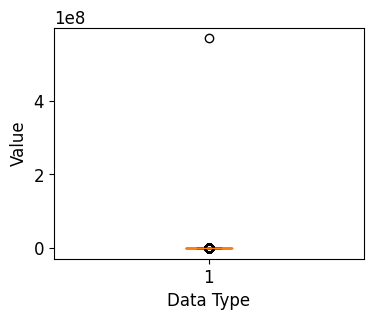

In [23]:
# 박스플롯
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

fig, ax = plt.subplots()
ax.boxplot(df['파생1'])
ax.set_xlabel('Data Type')
ax.set_ylabel('Value')

plt.show()

In [24]:
#len(df) == 12703 이므로
#12703*0.01 = 127
#12703*0.05 = 635
내림_sorted_df = df.sort_values(by='파생1', ascending=False).copy()
내림_sorted_df =내림_sorted_df[['파생1', '회사명', '거래소코드', '회계년도', 'label']].head(127)
내림_sorted_df

,파생1,회사명,거래소코드,회계년도,label
12805,inf,에이에프더블류(주),312610,2022/12,0
12408,inf,동신건설(주),25950,2013/12,0
10978,inf,(주)동원개발,13120,2013/12,0
3154,inf,(주)쎌바이오텍,49960,2018/12,0
11177,inf,(주)비츠로시스,54220,2022/03,0
...,...,...,...,...,...
973,1.365063e+04,(주)경동나비엔,9450,2021/12,0
480,1.359488e+04,동원수산(주),30720,2014/12,1
3591,1.350168e+04,(주)에스제이그룹,306040,2021/12,0
4922,1.342799e+04,(주)이크레더블,92130,2015/12,0


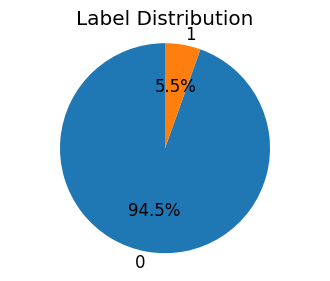

In [25]:
# label 열의 빈도수 계산
label_counts = df['label'].value_counts()
# 파이차트 그리기
label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 파이차트를 동그랗게 만듭니다.
plt.title('Label Distribution')
plt.ylabel('')  # y축 레이블 제거
plt.show()

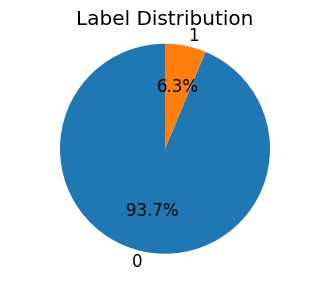

In [26]:
# 파생1 이상치가 있는 상위값 0.01부분 label 열의 빈도수 계산
이상치_label_counts = 내림_sorted_df.label.value_counts()
# 파이차트 그리기
이상치_label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 파이차트를 동그랗게 만듭니다.
plt.title('Label Distribution')
plt.ylabel('')  # y축 레이블 제거
plt.show()

In [27]:
#len(df) == 12703 이므로
#12703*0.01 = 127
#12703*0.05 = 635
오름_sorted_df = df.sort_values(by='파생1', ascending=True).copy()
오름_sorted_df =오름_sorted_df[['파생1', '회사명', '거래소코드', '회계년도', 'label']].head(127)
오름_sorted_df

,파생1,회사명,거래소코드,회계년도,label
11734,-inf,(주)정원엔시스,45510,2013/12,0
4821,-inf,(주)이상네트웍스,80010,2016/12,0
7129,-inf,남화토건(주),91590,2022/12,0
12788,-inf,에스씨아이평가정보(주),36120,2015/12,0
12785,-inf,에스씨아이평가정보(주),36120,2012/12,0
...,...,...,...,...,...
12522,-1.345448e+04,미원화학(주),134380,2022/12,0
2341,-1.319122e+04,(주)비지에프리테일,282330,2018/12,0
7443,-1.295197e+04,도이치모터스(주),67990,2016/12,0
6322,-1.290197e+04,(주)한국카본,17960,2015/12,0


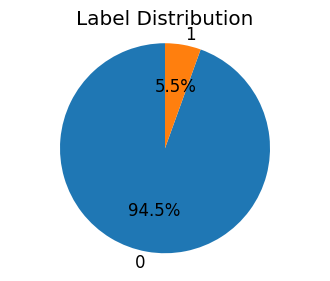

In [28]:
# 파생1 이상치가 있는 하위값 0.01부분 label 열의 빈도수 계산
이상치_오름_label_counts = 오름_sorted_df.label.value_counts()
# 파이차트 그리기
이상치_오름_label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 파이차트를 동그랗게 만듭니다.
plt.title('Label Distribution')
plt.ylabel('')  # y축 레이블 제거
plt.show()

파생1은 윈저라이징 해도 되지 않는지?


# 파생2
파2 : 순유동자산변화율 (%)

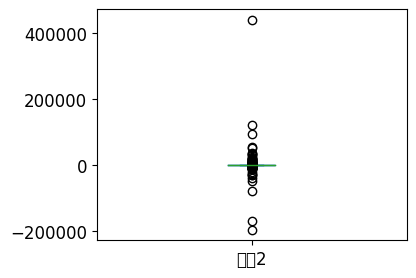

In [29]:
df['파생2'].plot(kind = 'box')
plt.show()

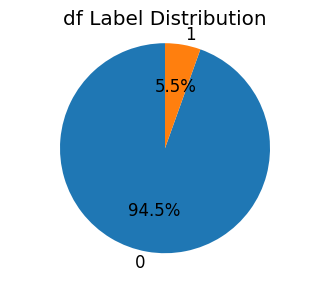

In [30]:
# 기존 df label 열의 빈도수 계산
label_counts = df['label'].value_counts()
# 파이차트 그리기
label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 파이차트를 동그랗게 만듭니다.
plt.title('df Label Distribution')
plt.ylabel('')  # y축 레이블 제거
plt.show()

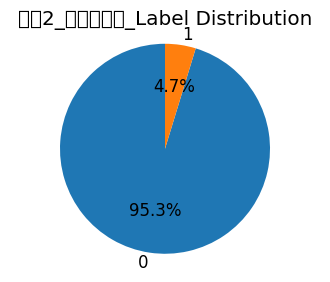

In [31]:
#len(df) == 12703 이므로
#12703*0.01 = 127
#12703*0.05 = 635
내림_sorted_df = df.sort_values(by='파생2', ascending=False).copy()
내림_sorted_df =내림_sorted_df[['파생2', '회사명', '거래소코드', '회계년도', 'label']].head(127)
내림_sorted_df

# 파생2 이상치가 있는 상위값 0.01부분 label 열의 빈도수 계산
이상치_label_counts = 내림_sorted_df.label.value_counts()
# 파이차트 그리기
이상치_label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 파이차트를 동그랗게 만듭니다.
plt.title('파생2_상위이상치_Label Distribution')
plt.ylabel('')  # y축 레이블 제거
plt.show()


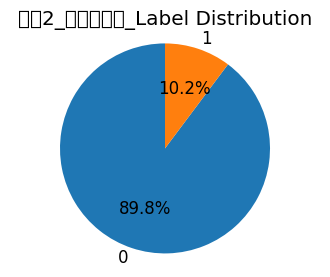

In [32]:
#len(df) == 12703 이므로
#12703*0.01 = 127
#12703*0.05 = 635
오름_sorted_df = df.sort_values(by='파생2', ascending=True).copy()
오름_sorted_df =오름_sorted_df[['파생2', '회사명', '거래소코드', '회계년도', 'label']].head(127)
오름_sorted_df

# 파생3 이상치가 있는 하위값 0.01부분 label 열의 빈도수 계산
이상치_오름_label_counts = 오름_sorted_df.label.value_counts()
# 파이차트 그리기
이상치_오름_label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 파이차트를 동그랗게 만듭니다.
plt.title('파생2_하위이상치_Label Distribution')
plt.ylabel('')  # y축 레이블 제거
plt.show()

In [33]:
오름_sorted_df[오름_sorted_df['label'] == 1 ]

,파생2,회사명,거래소코드,회계년도,label
623,-29851.842177,케이알모터스(주),40,2014/12,1
775,-8580.744173,(주)티에스넥스젠,43220,2013/12,1
80,-4615.256948,(주)리튬포어스,73570,2013/12,1
816,-3490.266850,삼성제약(주),1360,2013/12,1
320,-3283.370154,(주)젠큐릭스,229000,2022/12,1
107,-2345.353597,(주)부방,14470,2021/12,1
22,-1312.264827,(주)네온테크,306620,2022/12,1
379,-1288.736492,(주)토니모리,214420,2019/12,1
378,-1194.466300,(주)텔콘알에프제약,200230,2017/12,1
25,-1114.648304,(주)넥스턴바이오사이언스,89140,2022/12,1


In [34]:
# 하위1%의 값
# 음수값을 어떻게 처리할 것인가?
오름_sorted_df.tail(1)

,파생2,회사명,거래소코드,회계년도,label
4795,-887.975594,(주)이루온,65440,2012/12,0


# 파생3
이익잉여금 변화율

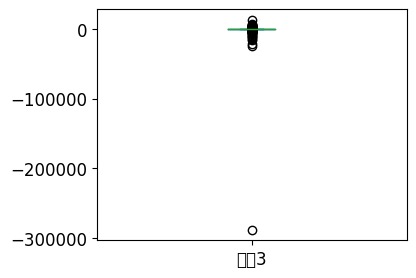

In [35]:
df['파생3'].plot(kind = 'box')
plt.show()

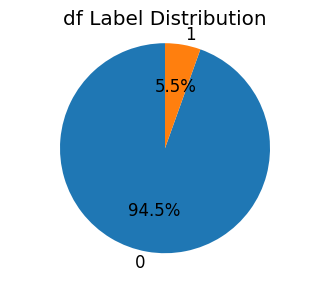

In [36]:
# label 열의 빈도수 계산
label_counts = df['label'].value_counts()
# 파이차트 그리기
label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 파이차트를 동그랗게 만듭니다.
plt.title('df Label Distribution')
plt.ylabel('')  # y축 레이블 제거
plt.show()


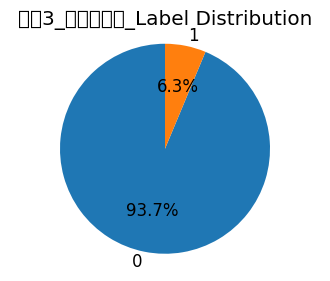

In [37]:
#len(df) == 12703 이므로
#12703*0.01 = 127
#12703*0.05 = 635
내림_sorted_df = df.sort_values(by='파생1', ascending=False).copy()
내림_sorted_df =내림_sorted_df[['파생1', '회사명', '거래소코드', '회계년도', 'label']].head(127)
내림_sorted_df
# 파생1 이상치가 있는 상위값 0.01부분 label 열의 빈도수 계산
이상치_label_counts = 내림_sorted_df.label.value_counts()
# 파이차트 그리기
이상치_label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 파이차트를 동그랗게 만듭니다.
plt.title('파생3_상위이상치_Label Distribution')
plt.ylabel('')  # y축 레이블 제거
plt.show()

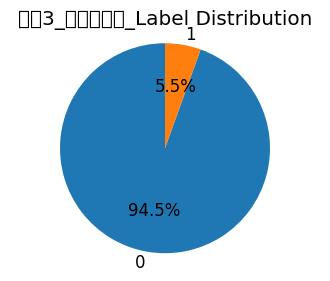

In [38]:
#len(df) == 12703 이므로
#12703*0.01 = 127
#12703*0.05 = 635
오름_sorted_df = df.sort_values(by='파생1', ascending=True).copy()
오름_sorted_df =오름_sorted_df[['파생1', '회사명', '거래소코드', '회계년도', 'label']].head(127)
오름_sorted_df

# 파생3 이상치가 있는 하위값 0.01부분 label 열의 빈도수 계산
이상치_오름_label_counts = 오름_sorted_df.label.value_counts()
# 파이차트 그리기
이상치_오름_label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 파이차트를 동그랗게 만듭니다.
plt.title('파생3_하위이상치_Label Distribution')
plt.ylabel('')  # y축 레이블 제거
plt.show()

# 파생4
파4 : 조정유동비율(%) 확인해보니 이상치가 더 중요함

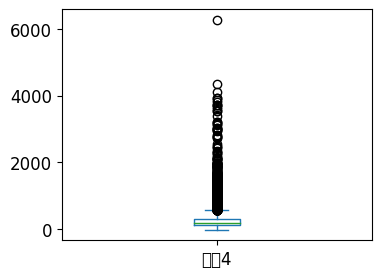

In [39]:
df['파생4'].plot(kind = 'box')
plt.show()

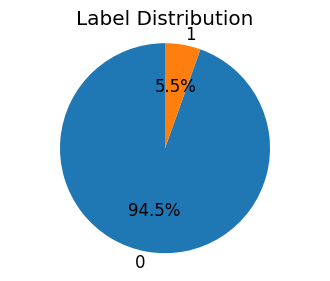

In [40]:
# label 열의 빈도수 계산
label_counts = df['label'].value_counts()
# 파이차트 그리기
label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 파이차트를 동그랗게 만듭니다.
plt.title('Label Distribution')
plt.ylabel('')  # y축 레이블 제거
plt.show()

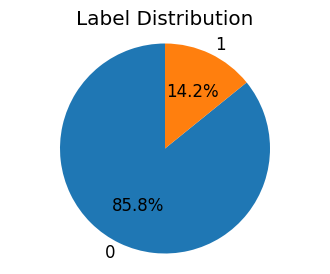

In [41]:
#len(df) == 12703 이므로
#12703*0.01 = 127
#12703*0.05 = 635
내림_sorted_df = df.sort_values(by='파생4', ascending=False).copy()
내림_sorted_df =내림_sorted_df[['파생1', '회사명', '거래소코드', '회계년도', 'label']].head(127)
내림_sorted_df
# 파생4 이상치가 있는 상위값 0.01부분 label 열의 빈도수 계산
이상치_label_counts = 내림_sorted_df.label.value_counts()
# 파이차트 그리기
이상치_label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 파이차트를 동그랗게 만듭니다.
plt.title('Label Distribution')
plt.ylabel('')  # y축 레이블 제거
plt.show()


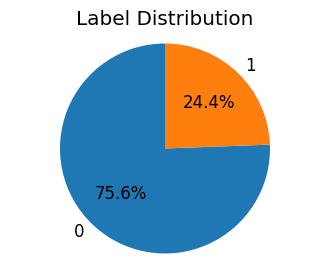

In [42]:
#len(df) == 12703 이므로
#12703*0.01 = 127
#12703*0.05 = 635
오름_sorted_df = df.sort_values(by='파생4', ascending=True).copy()
오름_sorted_df =오름_sorted_df[['파생4', '회사명', '거래소코드', '회계년도', 'label']].head(127)
오름_sorted_df


# 파생1 이상치가 있는 하위값 0.01부분 label 열의 빈도수 계산
이상치_오름_label_counts = 오름_sorted_df.label.value_counts()
# 파이차트 그리기
이상치_오름_label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 파이차트를 동그랗게 만듭니다.
plt.title('Label Distribution')
plt.ylabel('')  # y축 레이블 제거
plt.show()

# 파생5
파5 : 알파리스크 종합지표

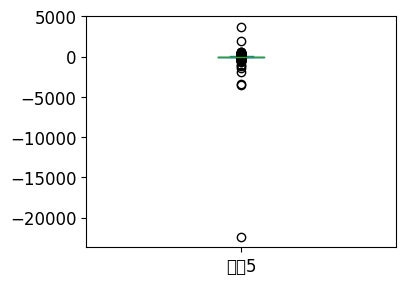

In [43]:
df['파생5'].plot(kind = 'box')
plt.show()

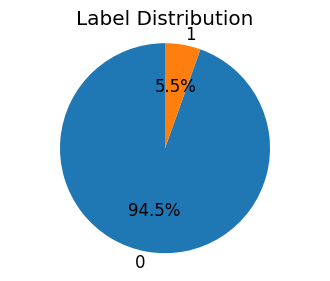

In [44]:
# label 열의 빈도수 계산
label_counts = df['label'].value_counts()
# 파이차트 그리기
label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 파이차트를 동그랗게 만듭니다.
plt.title('Label Distribution')
plt.ylabel('')  # y축 레이블 제거
plt.show()

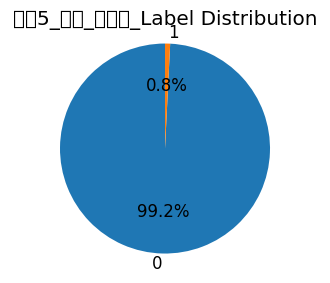

In [45]:
#len(df) == 12703 이므로
#12703*0.01 = 127
#12703*0.05 = 635
내림_sorted_df = df.sort_values(by='파생5', ascending=False).copy()
내림_sorted_df =내림_sorted_df[['파생5', '회사명', '거래소코드', '회계년도', 'label']].head(127)
내림_sorted_df
# 파생5 이상치가 있는 상위값 0.01부분 label 열의 빈도수 계산
이상치_label_counts = 내림_sorted_df.label.value_counts()
# 파이차트 그리기
이상치_label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 파이차트를 동그랗게 만듭니다.
plt.title('파생5_상위_이상치_Label Distribution')
plt.ylabel('')  # y축 레이블 제거
plt.show()

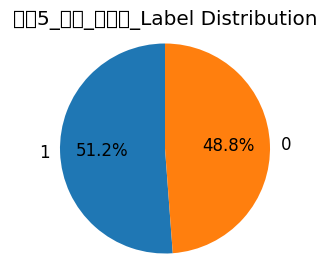

In [46]:
#len(df) == 12703 이므로
#12703*0.01 = 127
#12703*0.05 = 635
오름_sorted_df = df.sort_values(by='파생5', ascending=True).copy()
오름_sorted_df =오름_sorted_df[['파생5', '회사명', '거래소코드', '회계년도', 'label']].head(127)
오름_sorted_df


# 파생5 이상치가 있는 하위값 0.01부분 label 열의 빈도수 계산
이상치_오름_label_counts = 오름_sorted_df.label.value_counts()
# 파이차트 그리기
이상치_오름_label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 파이차트를 동그랗게 만듭니다.
plt.title('파생5_하위_이상치_Label Distribution')
plt.ylabel('')  # y축 레이블 제거
plt.show()

# 기존변수들 EDA 재조정필요 (파생을 추가하면 인덱스 번호가 바뀜)

기존변수들 : 파생을 넣으면서 데이터프레임의 인덱스 번호가 바꼈기 때문에 다시 최종적으로 점검한 이후, 최종 CSV 파일을 만들어야함


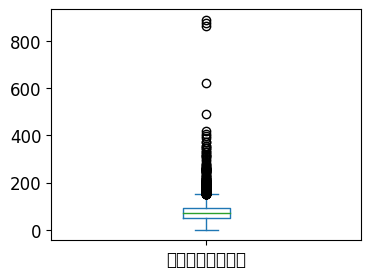

In [47]:
df['비유동장기적합률'].plot(kind='box')
plt.show()

In [48]:
df[df['비유동장기적합률'] > 500][['비유동장기적합률', '회사명', '거래소코드', '회계년도', 'label']]


,비유동장기적합률,회사명,거래소코드,회계년도,label
9692,890.39,참엔지니어링(주),9310,2015/12,0
9693,623.11,참엔지니어링(주),9310,2016/12,0
12691,877.47,신세계건설(주),34300,2013/12,0
12692,865.03,신세계건설(주),34300,2014/12,0


- (주) 플렉스컴 > 기타법인이므로 drop (65270)
- 엠텍비젼(주) > 기타법인이므로 drop(74000)
- 잘만테크(주)> 기타법인이므로 drop(90120)
- (주)에이제이에스 > 기타법인이므로 drop(13340)
- (주)알앤엘바이오 > 기타법인이므로 drop(3190)
- (주)에듀언스 > 기타법인이므로 drop(9010)
- (주)와이즈파워 > 기타법인이므로 drop(40670)
- 유네코(주) > 기타법인이므로 drop(64510)
- 이디디컴퍼니(주) > 기타법인이므로 drop(52650)
- (주)화진 > 기타법인이므로 drop(134780)

In [49]:
# 리스트에 해당하는 거래소코드를 제외한 행을 선택하여 새로운 데이터프레임을 만듭니다.
df = df[~df['거래소코드'].isin([65270,74000,90120,13340,3190,9010,40670,64050,52650,134780,110570])]


In [50]:
df[df['거래소코드'] == 13340]

,회사명,거래소코드,회계년도,배당성향,자기자본순이익률,매출액순이익률,총자본순이익률,경영자본순이익률,총자본사업이익률,총자본정상영업이익률,...,비유동자산증가율,유형자산증가율,회계기준,년도,파생1,파생2,파생3,파생4,파생5,label


In [51]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '배당성향', '자기자본순이익률', '매출액순이익률', '총자본순이익률',
       '경영자본순이익률', '총자본사업이익률', '총자본정상영업이익률', '매출액정상영업이익률', 'CASH FLOW 대 부채비율',
       'CASH FLOW 대 차입금비율', 'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율',
       '영업활동으로 인한 현금흐름(간접법)(*)', '금융비용', '단기차입금(*)', '유동성장기차입금의 감소', '부가가치',
       '총자본투자효율', '설비투자효율', '부가가치율', '이윤분배율', '자본분배율', '자기주식', '유동자산(*)',
       '유동부채(*)', '상장일', '유동비율', '당좌비율', '부채비율', '차입금의존도', '유동부채비율', '순운전자본비율',
       '현금비율', '유동자산구성비율', '자기자본구성비율', '비유동장기적합률', '재고자산회전률', '매출채권회전률',
       '매입채무회전률', '총자본회전률', '비유동자산회전률', '당좌자산회전률', '유형자산회전율', '경영자본회전률',
       '유동자산회전률', '자기자본회전률', '재고자산회전기간', '매출채권회전기간', '매입채무회전기간', '합계_1인년간평균급여',
       '합계_평균근속연수', '감사의견코드', '매출액증가율', '정상영업이익증가율', '순이익증가율', '총자본증가율',
       '유동자산증가율', '비유동자산증가율', '유형자산증가율', '회계기준', '년도', '파생1', '파생2', '파생3',
       '파생4', '파생5', 'label'],
      dtype='object')

In [52]:
df[['재고자산회전기간', '매출채권회전기간',
       '매입채무회전기간']].describe()

,재고자산회전기간,매출채권회전기간,매입채무회전기간
count,12703.000000,12703.000000,12703.000000
mean,73.356384,66.544242,35.111906
std,2264.058312,163.297944,458.435522
min,0.000000,-4.740000,0.000000
25%,19.115000,37.970000,14.910000
50%,41.790000,55.900000,25.380000
75%,69.620000,77.720000,39.240000
max,254780.810000,13774.300000,50880.470000


#### 매출채권 회전율

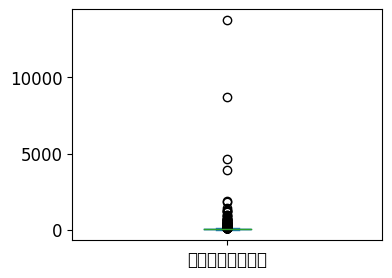

In [53]:
df['매출채권회전기간'].plot(kind='box')
plt.show()

- 신라섬유(주) : 매출채권회전기간이 음수
- 0으로 대체 (13635,13636,13637 행)
    - 신라섬유(주) 2017년, 2018년, 2019년

In [54]:
df[df['매출채권회전기간'] < 0]

,회사명,거래소코드,회계년도,배당성향,자기자본순이익률,매출액순이익률,총자본순이익률,경영자본순이익률,총자본사업이익률,총자본정상영업이익률,...,비유동자산증가율,유형자산증가율,회계기준,년도,파생1,파생2,파생3,파생4,파생5,label
12683,신라섬유(주),1000,2017/12,0.0,2.94,10.23,1.26,2.80,1.67,1.66,...,-0.278070,-8.318923,IFRS개별,2017,-0.135790,2.896601,12.183270,8.17,-46.272631,0
12684,신라섬유(주),1000,2018/12,0.0,1.21,3.64,0.54,1.73,2.39,2.37,...,-0.430735,-61.891144,IFRS개별,2018,192122.915364,1.719286,5.208276,7.54,-48.970924,0
12685,신라섬유(주),1000,2019/12,0.0,1.59,5.44,0.71,3.69,2.29,2.29,...,0.842643,-1.481127,IFRS개별,2019,-73.900248,-0.299553,7.394293,7.23,-47.811907,0


In [55]:
df[df['거래소코드'] == 1000][['거래소코드','회계년도','매출채권회전기간','매출채권회전률','회계기준']]

,거래소코드,회계년도,매출채권회전기간,매출채권회전률,회계기준
12678,1000,2012/12,85.11,4.29,IFRS개별
12679,1000,2013/12,106.07,3.44,IFRS개별
12680,1000,2014/12,205.77,1.77,IFRS개별
12681,1000,2015/12,109.64,3.33,IFRS개별
12682,1000,2016/12,1.62,225.89,IFRS개별
12683,1000,2017/12,-4.74,0.00,IFRS개별
12684,1000,2018/12,-4.31,0.00,IFRS개별
12685,1000,2019/12,-2.98,0.00,IFRS개별
12686,1000,2020/12,6.48,56.35,IFRS개별
12687,1000,2021/12,18.99,19.22,IFRS개별


In [56]:
df.loc[df['매출채권회전기간'] < 0, '매출채권회전기간'] = 0

- 확인

In [57]:
df[df['매출채권회전기간'] < 0]


,회사명,거래소코드,회계년도,배당성향,자기자본순이익률,매출액순이익률,총자본순이익률,경영자본순이익률,총자본사업이익률,총자본정상영업이익률,...,비유동자산증가율,유형자산증가율,회계기준,년도,파생1,파생2,파생3,파생4,파생5,label


- 매출채권 회전기간이 너무 높은 기업들은 매출채권 회전율이 매우 낮기 떄문 (0.1 미만)

- 0으로 대체

In [58]:
df[df['매출채권회전기간'] > 4000]


,회사명,거래소코드,회계년도,배당성향,자기자본순이익률,매출액순이익률,총자본순이익률,경영자본순이익률,총자본사업이익률,총자본정상영업이익률,...,비유동자산증가율,유형자산증가율,회계기준,년도,파생1,파생2,파생3,파생4,파생5,label
1408,(주)대덕,8060,2020/12,12.96,17.88,4378.76,10.37,12.01,0.10,-0.29,...,51.491206,82.058125,IFRS연결,2020,-27.324460,-12.000690,17.576106,250.300000,17.510752,0
13036,프레스티지바이오로직스(주),334970,2022/12,0.00,-44.30,-319406.80,-21.39,-36.90,-15.46,-15.76,...,50.250989,51.416198,IFRS개별,2022,-26.533547,-145.432932,-40.965319,91.660000,-90.492582,0
13095,한국앤컴퍼니(주),240,2012/12,0.00,182.43,8332.24,118.54,156.51,0.88,0.49,...,-80.052635,-97.800604,IFRS개별,2012,4.650023,184.181752,113.459321,605.230238,193.775341,0


In [59]:
df[df['거래소코드'] == 334970][['거래소코드','회계년도','매출채권회전기간','매출채권회전률','회계기준']]


,거래소코드,회계년도,매출채권회전기간,매출채권회전률,회계기준
13035,334970,2021/12,66.44,5.49,IFRS개별
13036,334970,2022/12,13774.30,0.03,IFRS개별


In [60]:
df[df['거래소코드'] == 240][['거래소코드','회계년도','매출채권회전기간','매출채권회전률','회계기준']]


,거래소코드,회계년도,매출채권회전기간,매출채권회전률,회계기준
10189,240,2017/12,64.06,5.70,IFRS연결
10190,240,2018/12,63.08,5.79,IFRS연결
10191,240,2019/12,60.44,6.04,IFRS연결
10192,240,2020/12,56.50,6.46,IFRS연결
10193,240,2021/12,53.17,6.86,IFRS연결
10194,240,2022/12,58.83,6.20,IFRS연결
13095,240,2012/12,4671.16,0.08,IFRS개별
13096,240,2013/12,94.90,3.85,IFRS개별
13097,240,2014/12,39.18,9.32,IFRS개별
13098,240,2015/12,43.41,8.41,IFRS개별


In [61]:
df[df['거래소코드'] == 8060][['거래소코드','회계년도','매출채권회전기간','매출채권회전률','회계기준']]

,거래소코드,회계년도,매출채권회전기간,매출채권회전률,회계기준
1405,8060,2012/12,48.28,7.56,IFRS연결
1406,8060,2013/12,42.91,8.51,IFRS연결
1407,8060,2019/12,57.77,6.32,IFRS연결
1408,8060,2020/12,8696.55,0.04,IFRS연결
1409,8060,2021/12,0.00,0.00,IFRS연결
1410,8060,2022/12,0.00,0.00,IFRS연결
10872,8060,2014/12,37.65,9.69,IFRS개별
10873,8060,2015/12,40.76,8.95,IFRS개별
10874,8060,2016/12,43.83,8.33,IFRS개별
10875,8060,2017/12,45.01,8.11,IFRS개별


In [62]:
df.loc[df['매출채권회전기간'] > 4000, '매출채권회전기간'] = 0


- 확인

In [63]:
df.loc[df['매출채권회전기간'] > 4000]

,회사명,거래소코드,회계년도,배당성향,자기자본순이익률,매출액순이익률,총자본순이익률,경영자본순이익률,총자본사업이익률,총자본정상영업이익률,...,비유동자산증가율,유형자산증가율,회계기준,년도,파생1,파생2,파생3,파생4,파생5,label


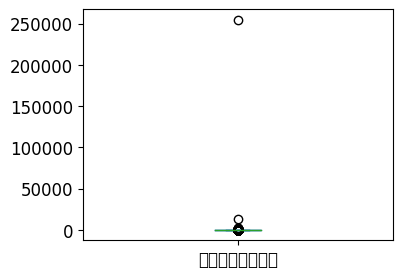

In [64]:
df['재고자산회전기간'].plot(kind='box')
plt.show()

- 0으로 대체

In [65]:
df[df['재고자산회전기간'] > 10000]

,회사명,거래소코드,회계년도,배당성향,자기자본순이익률,매출액순이익률,총자본순이익률,경영자본순이익률,총자본사업이익률,총자본정상영업이익률,...,비유동자산증가율,유형자산증가율,회계기준,년도,파생1,파생2,파생3,파생4,파생5,label
1408,(주)대덕,8060,2020/12,12.96,17.88,4378.76,10.37,12.01,0.10,-0.29,...,51.491206,82.058125,IFRS연결,2020,-27.324460,-12.000690,17.576106,250.30,17.510752,0
13036,프레스티지바이오로직스(주),334970,2022/12,0.00,-44.30,-319406.80,-21.39,-36.90,-15.46,-15.76,...,50.250989,51.416198,IFRS개별,2022,-26.533547,-145.432932,-40.965319,91.66,-90.492582,0


In [66]:
df.loc[df['재고자산회전기간'] > 10000, '재고자산회전기간'] = 0


- 확인

In [67]:
df[df['재고자산회전기간'] > 10000]

,회사명,거래소코드,회계년도,배당성향,자기자본순이익률,매출액순이익률,총자본순이익률,경영자본순이익률,총자본사업이익률,총자본정상영업이익률,...,비유동자산증가율,유형자산증가율,회계기준,년도,파생1,파생2,파생3,파생4,파생5,label


In [68]:
df[df['재고자산회전기간'] > 10000][['거래소코드','회계년도','재고자산회전기간','재고자산회전률','회계기준']]

,거래소코드,회계년도,재고자산회전기간,재고자산회전률,회계기준


In [69]:
df[(df['재고자산회전률'] <0.05) & (df['재고자산회전률'] >0)][['재고자산회전기간', '거래소코드','회계년도','회사명','재고자산회전률']]


,재고자산회전기간,거래소코드,회계년도,회사명,재고자산회전률
1408,0.0,8060,2020/12,(주)대덕,0.03


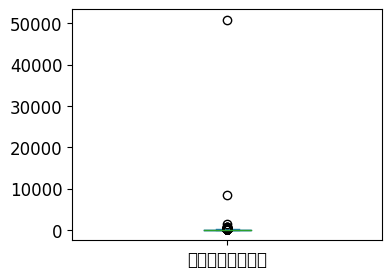

In [70]:
df['매입채무회전기간'].plot(kind='box')
plt.show()

In [71]:
df[df['매입채무회전기간'] > 7000][['거래소코드','회계년도','매입채무회전기간','매입채무회전률','회계기준','회사명','label','감사의견코드']]

,거래소코드,회계년도,매입채무회전기간,매입채무회전률,회계기준,회사명,label,감사의견코드
1408,8060,2020/12,8466.66,0.04,IFRS연결,(주)대덕,0,UQ
13036,334970,2022/12,50880.47,0.01,IFRS개별,프레스티지바이오로직스(주),0,UQ


- 1513행 이상치 중복 > drop (주)대덕 2020년 data (원본 data :13029rows)
- 13961 0으로 대체

In [72]:
df = df.drop(1513, axis=0)

- 대덕 2020년 행 drop/잘 drop됐는지 확인

In [73]:
df[df['거래소코드'] == 8060]

,회사명,거래소코드,회계년도,배당성향,자기자본순이익률,매출액순이익률,총자본순이익률,경영자본순이익률,총자본사업이익률,총자본정상영업이익률,...,비유동자산증가율,유형자산증가율,회계기준,년도,파생1,파생2,파생3,파생4,파생5,label
1405,(주)대덕,8060,2012/12,26.11,11.79,6.47,9.05,10.75,11.29,10.50,...,-7.730611,-8.704090,IFRS연결,2012,381.087054,91.852560,10.681341,191.868125,19.359020,0
1406,(주)대덕,8060,2013/12,122.63,1.95,1.14,1.55,1.81,1.24,0.19,...,-7.847727,-3.834538,IFRS연결,2013,25.972686,14.246301,-0.968833,250.863536,9.592935,0
1407,(주)대덕,8060,2019/12,30.87,6.38,6.02,5.52,6.52,4.48,3.97,...,12.116901,-5.729301,IFRS연결,2019,566.550933,-4.666830,6.053623,330.019399,9.993877,0
1408,(주)대덕,8060,2020/12,12.96,17.88,4378.76,10.37,12.01,0.10,-0.29,...,51.491206,82.058125,IFRS연결,2020,-27.324460,-12.000690,17.576106,250.300000,17.510752,0
1409,(주)대덕,8060,2021/12,99.65,-0.39,3.99,3.25,3.63,4.31,4.00,...,-3.070746,0.009066,IFRS연결,2021,352.841662,18.365229,-58.493908,297.870000,-1.608399,0
1410,(주)대덕,8060,2022/12,0.00,3.20,8.03,7.36,8.26,11.35,10.85,...,10.242735,8.955396,IFRS연결,2022,-327.016342,2.447864,2.814855,251.380000,2.578027,0
10872,(주)대덕,8060,2014/12,41.35,7.01,4.37,5.67,7.49,5.54,4.55,...,21.791068,0.493150,IFRS개별,2014,-20.159134,-27.438663,4.350972,175.649896,18.665486,0
10873,(주)대덕,8060,2015/12,40.83,6.84,5.97,5.71,7.34,6.00,5.00,...,-26.978188,-2.469746,IFRS개별,2015,4.623578,92.933871,5.617839,364.690274,15.802853,0
10874,(주)대덕,8060,2016/12,53.47,5.06,4.76,4.31,5.42,6.24,5.31,...,22.641718,-10.178805,IFRS개별,2016,-57.034293,-19.575033,1.633833,257.419309,13.153645,0
10875,(주)대덕,8060,2017/12,35.09,7.22,6.95,6.11,7.94,6.01,5.25,...,2.208964,7.917921,IFRS개별,2017,-394.353769,26.521778,6.035571,316.577524,14.823860,0


In [74]:
df.loc[df['매입채무회전기간'] > 7000]

,회사명,거래소코드,회계년도,배당성향,자기자본순이익률,매출액순이익률,총자본순이익률,경영자본순이익률,총자본사업이익률,총자본정상영업이익률,...,비유동자산증가율,유형자산증가율,회계기준,년도,파생1,파생2,파생3,파생4,파생5,label
1408,(주)대덕,8060,2020/12,12.96,17.88,4378.76,10.37,12.01,0.10,-0.29,...,51.491206,82.058125,IFRS연결,2020,-27.324460,-12.000690,17.576106,250.30,17.510752,0
13036,프레스티지바이오로직스(주),334970,2022/12,0.00,-44.30,-319406.80,-21.39,-36.90,-15.46,-15.76,...,50.250989,51.416198,IFRS개별,2022,-26.533547,-145.432932,-40.965319,91.66,-90.492582,0


In [75]:
df.loc[df['매입채무회전기간'] > 7000, '매입채무회전기간'] = 0


- 확인

In [76]:
df.loc[df['매입채무회전기간'] > 7000]

,회사명,거래소코드,회계년도,배당성향,자기자본순이익률,매출액순이익률,총자본순이익률,경영자본순이익률,총자본사업이익률,총자본정상영업이익률,...,비유동자산증가율,유형자산증가율,회계기준,년도,파생1,파생2,파생3,파생4,파생5,label


=============================================회전기간 이상치처리 완료===================================================

In [77]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '배당성향', '자기자본순이익률', '매출액순이익률', '총자본순이익률',
       '경영자본순이익률', '총자본사업이익률', '총자본정상영업이익률', '매출액정상영업이익률', 'CASH FLOW 대 부채비율',
       'CASH FLOW 대 차입금비율', 'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율',
       '영업활동으로 인한 현금흐름(간접법)(*)', '금융비용', '단기차입금(*)', '유동성장기차입금의 감소', '부가가치',
       '총자본투자효율', '설비투자효율', '부가가치율', '이윤분배율', '자본분배율', '자기주식', '유동자산(*)',
       '유동부채(*)', '상장일', '유동비율', '당좌비율', '부채비율', '차입금의존도', '유동부채비율', '순운전자본비율',
       '현금비율', '유동자산구성비율', '자기자본구성비율', '비유동장기적합률', '재고자산회전률', '매출채권회전률',
       '매입채무회전률', '총자본회전률', '비유동자산회전률', '당좌자산회전률', '유형자산회전율', '경영자본회전률',
       '유동자산회전률', '자기자본회전률', '재고자산회전기간', '매출채권회전기간', '매입채무회전기간', '합계_1인년간평균급여',
       '합계_평균근속연수', '감사의견코드', '매출액증가율', '정상영업이익증가율', '순이익증가율', '총자본증가율',
       '유동자산증가율', '비유동자산증가율', '유형자산증가율', '회계기준', '년도', '파생1', '파생2', '파생3',
       '파생4', '파생5', 'label'],
      dtype='object')

## 회전율

In [78]:
turnover = df[['회사명','거래소코드','회계년도','재고자산회전률', '매출채권회전률', '매입채무회전률', '총자본회전률', '비유동자산회전률', '당좌자산회전률','유형자산회전율', '경영자본회전률', '유동자산회전률', '자기자본회전률']]

In [79]:
turnover.describe()

,거래소코드,재고자산회전률,매출채권회전률,매입채무회전률,총자본회전률,비유동자산회전률,당좌자산회전률,유형자산회전율,경영자본회전률,유동자산회전률,자기자본회전률
count,12702.000000,12702.000000,12702.000000,1.270200e+04,12702.000000,12702.000000,12702.000000,12702.000000,12702.000000,12702.000000,12702.000000
mean,78006.167533,370.169139,9.622641,7.407955e+02,0.930881,2.494558,2.785342,11.240479,1.100628,1.985801,1.894091
std,91212.355173,9268.213039,37.427348,4.399567e+04,0.531268,3.462850,1.996992,56.517572,0.615673,1.202157,1.730166
min,20.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13120.000000,4.670000,4.670000,8.650000e+00,0.580000,1.120000,1.510000,1.840000,0.710000,1.210000,0.872500
50%,49305.000000,7.875000,6.500000,1.363500e+01,0.840000,1.770000,2.410000,3.070000,0.990000,1.780000,1.430000
75%,100840.000000,14.850000,9.550000,2.207750e+01,1.160000,2.847500,3.570000,5.630000,1.360000,2.500000,2.317500
max,950200.000000,822286.770000,3701.320000,4.745450e+06,5.420000,126.340000,40.500000,1900.200000,10.130000,17.770000,29.750000


#### 재고자산회전율

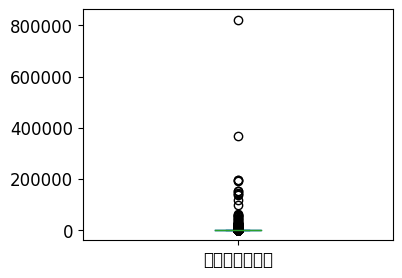

In [80]:
df['재고자산회전률'].plot(kind='box')
plt.show()

In [81]:
df[df['재고자산회전률'] > 200000][['회사명','거래소코드','회계년도','재고자산회전률','label','회계기준']]

,회사명,거래소코드,회계년도,재고자산회전률,label,회계기준
5511,(주)케이엔엔,58400,2014/12,366803.24,0,IFRS연결
13110,한국전력기술(주),52690,2015/12,822286.77,0,IFRS개별


- (주)케이엔엔 (58400)
    - 당기/전기 재고자산이 0이 있었기 때문
    - 확인완료 안고가기

- 한국전력기술(주) (52690)
    - 당기 재고자산 : 0
    - 전기 재고자산 : 1
    - 산식: 매출액/평균재고자산 이므로 이상치로 판단
    - 0으로 대체

In [82]:
df.loc[df['재고자산회전률'] == 822286.77, '재고자산회전률'] = 0

- 확인

In [83]:
df[df['재고자산회전률'] > 200000][['회사명','거래소코드','회계년도','재고자산회전률','label','회계기준']]

,회사명,거래소코드,회계년도,재고자산회전률,label,회계기준
5511,(주)케이엔엔,58400,2014/12,366803.24,0,IFRS연결


#### 매출채권회전율

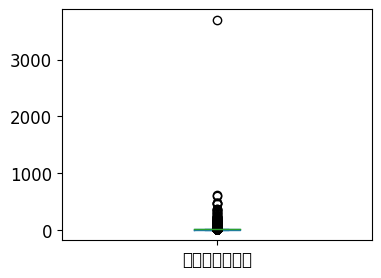

In [84]:
df['매출채권회전률'].plot(kind='box')
plt.show()

In [85]:
df[df['매출채권회전률'] > 400][['회사명','거래소코드','회계년도','매출채권회전률','label','회계기준']]


,회사명,거래소코드,회계년도,매출채권회전률,label,회계기준
1383,(주)다우기술,23590,2020/12,464.70,0,IFRS연결
1384,(주)다우기술,23590,2021/12,589.64,0,IFRS연결
2332,(주)비지에프,27410,2014/12,460.17,0,IFRS연결
2333,(주)비지에프,27410,2015/12,478.90,0,IFRS연결
12309,남화산업(주),111710,2018/12,3701.32,0,IFRS개별
12310,남화산업(주),111710,2019/12,465.79,0,IFRS개별
12311,남화산업(주),111710,2020/12,619.69,0,IFRS개별


- (주)에코바이브 : 기타법인이므로 drop
    - 거래소 코드: 15540
    - label : 1
- (주) 자유투어 : 기타법인이므로 drop
    - 거래소 코드: 46840
    - label : 1

- > 13026 row

In [86]:
df = df.drop([248,340], axis=0)

KeyError: '[248] not found in axis'

#### 매입채무회전률, 총자본회전률, 당좌자산회전률 경영자본회전률 유동자산회전률	자기자본회전률 평균값, min, max값의 배열이 비교적 안정적 분포를 띄므로 패스
 - 당좌자산회전률은 확인완료

In [ ]:
turnover.describe()

In [ ]:
df['매입채무회전률'].plot(kind='box')
plt.show()

In [ ]:
df['총자본회전률'].plot(kind='box')
plt.show()

In [ ]:
df['당좌자산회전률'].plot(kind='box')
plt.show()

In [ ]:
df[df['당좌자산회전률'] > 30]

#### 비유동자산회전율
    - 확인완료

In [ ]:
df['비유동자산회전률'].plot(kind='box')
plt.show()

In [ ]:
df[df['비유동자산회전률'] > 60][['회사명','거래소코드','회계년도','비유동자산회전률','label','회계기준']]

#### 유형자산회전율

In [ ]:
df['유형자산회전율'].plot(kind='box')
plt.show()

In [ ]:
df[df['유형자산회전율'] > 3000][['회사명','거래소코드','회계년도','유형자산회전율','label','회계기준']]


- 확인완료

================================================ 활동성 확인완료 ===========================================

In [ ]:
safe = df[['유동비율', '당좌비율', '부채비율', '차입금의존도',
       '유동부채비율', '순운전자본비율', '현금비율', '유동자산구성비율', '자기자본구성비율']]

In [ ]:
safe.describe()

#### 유동비율

In [ ]:
df['유동비율'].plot(kind='box')
plt.show()

In [ ]:
df[df['유동비율'] > 3000][['회사명','거래소코드','회계년도','유동비율','label','회계기준']]


- 4253	(주)엔케이맥스	262760	2018/12	4945.26	0	IFRS연결 기타법인 drop
- 13025 rows × 65 columns

In [ ]:
df = df.drop(4253, axis=0)

#### 당좌비율

In [ ]:
df['당좌비율'].plot(kind='box')
plt.show()

In [ ]:
df[df['당좌비율'] > 3000][['회사명','거래소코드','회계년도','유동비율','당좌비율','label','회계기준']]


- 유동비율 당좌비율 모두 높은걸로 보어느 한군데 이상한 수치는 없는듯

#### 부채비율

In [ ]:
df['부채비율'].plot(kind='box')
plt.show()

In [ ]:
df[df['부채비율'] > 3000][['회사명','거래소코드','회계년도','부채비율','label','회계기준']]

- 587	에버테크노(주)	70480	2013/12	7670.25	1	IFRS연결 기타법인 이므로 drop > 13024행
- 787	(주)어스앤에어로스페이스	263540	2020/12	25729.81	1	IFRS개별 확인완료
- 7707	금호건설(주)	2990	2012/12	13206.81	0	IFRS연결 확인완료
- 555	삼부토건(주)	1470	2013/12	3298.51	1	IFRS연결 확인완료

In [ ]:
df = df.drop(587, axis=0)

차입금의존도',
       '유동부채비율', '순운전자본비율', '현금비율', '유동자산구성비율', '자기자본구성비율'

In [ ]:
df['차입금의존도'].plot(kind='box')
plt.show()

In [ ]:
df[df['차입금의존도'] > 300][['회사명','거래소코드','회계년도','차입금의존도','label','회계기준']]


- 5073	(주)유디피	91270	2017/12	749.4	0	IFRS연결 기타법인이므로 drop

In [ ]:
df = df.drop(5073, axis=0)


In [ ]:
safe.describe()

#### 유동부채비율

In [ ]:
df['유동부채비율'].plot(kind='box')
plt.show()

In [ ]:
df[df['유동부채비율'] > 2000][['회사명','거래소코드','회계년도','유동부채비율','label']]


## 성장률

In [ ]:
# 새 파일에 결측치 없음 확인
df.isna().sum().sum()

In [ ]:
df.columns

In [ ]:
grow = df[['매출액증가율', '정상영업이익증가율', '순이익증가율', '총자본증가율',
       '유동자산증가율', '비유동자산증가율', '유형자산증가율']]

In [ ]:
grow.describe()

#### 매출액증가율

In [ ]:
df['매출액증가율'].plot(kind='box')
plt.show()

In [ ]:
df[df['매출액증가율'] > 7000] ## 확인완료

#### 정상영업이익증가율

In [ ]:
df['정상영업이익증가율'].plot(kind='box')
plt.show()

- 한일현대시멘트(주) 정정보고 반영되지 않음.
    - 2013년 영업이익 45,701	2012년 영업이익 29,088
    - 57.11289878987898 로 대체


In [ ]:
((45701-29088)/29088)*100

In [ ]:
df.loc[df['정상영업이익증가율'] == 53516.842967, '정상영업이익증가율'] = 57.112898789

In [ ]:
df[df['정상영업이익증가율'] > 20000] ## 확인완료


#### 총자본증가율

In [ ]:
df['총자본증가율'].plot(kind='box')
plt.show()

In [ ]:
df[df['총자본증가율'] > 700] ## 확인완료


#### 유동자산증가율

In [ ]:
df['유동자산증가율'].plot(kind='box')
plt.show()

- (주)카이노스메드 drop 처리 : 기타법인

In [ ]:
df[df['유동자산증가율'] > 1000] ## 확인완료


In [ ]:
df = df.drop(824, axis=0)

#### 비유동자산증가율

In [ ]:
df['비유동자산증가율'].plot(kind='box')
plt.show()

In [ ]:
df[df['비유동자산증가율'] > 2000] ## 확인완료


#### 유형자산증가율

In [ ]:
df['유형자산증가율'].plot(kind='box')
plt.show()

In [ ]:
df[df['유형자산증가율'] > 20000] ## 확인완료


In [ ]:
df

#### 레이블 비교 타임

In [ ]:
corp0 = df[df['label'] == 0]

In [ ]:
corp1 = df[df['label'] == 1]


In [ ]:
corp0.describe()

In [ ]:
corp1.describe()

In [ ]:
df['배당성향'].plot(kind='box')
plt.show()

In [ ]:
corp0[df['배당성향'] > 7000]


In [ ]:
df[df['배당성향'] > 100][['회사명','거래소코드','회계년도','배당성향','label']]

- 배당성향이 100이상인 값은 이상치로 판단하고, 이상치 처리 고민 > 100으로 대체
- 배당성향이 높은 것은 당기 순이익이 작기 떄문
- 배당성향 산식: 배당금 / 당기순이익

In [ ]:
df.loc[df['배당성향'] >100, '배당성향'] = 100

In [ ]:
corp0_배당이후 = df[df['label'] == 0]
corp1_배당이후 = df[df['label'] == 1]


In [ ]:
corp0_배당이후.describe()

In [ ]:
corp1_배당이후.describe()


In [ ]:
df.to_csv('before_winsorizing.csv', encoding='cp949')